In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def hypothesis(x,theta) :
    #theta = [theta0 , theta1]
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i][0]
        y = Y[i]
        y_ = hypothesis(x,theta)
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
        
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
        
    return total_error/m



def gradientDescent(X,Y,maxSteps = 100, learningRate = 0.1):
    theta = np.zeros((2,))
    error_list = []
    for i in range(maxSteps):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        theta[0] = theta[0] - learningRate * grad[0]
        theta[1] = theta[1] - learningRate * grad[1]
        
    return theta, error_list

In [4]:
plt.scatter(X,Y)
plt.show()

NameError: name 'X' is not defined

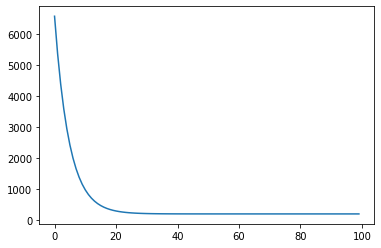

In [5]:
X = pd.read_csv("Linear_X_Train.csv")
Y = pd.read_csv("Linear_Y_Train.csv")
X = X.values
Y = Y.values


u = X.mean()
std = X.std()
X = (X-u)/std


theta, error_list = gradientDescent(X,Y)
# print(theta)
# print(error_list)
plt.plot(error_list)
plt.show()

In [8]:
X_Test = pd.read_csv("Linear_X_Test.csv").values

Y_Test = hypothesis(X_Test,theta)

In [9]:
df = pd.DataFrame(data = Y_Test,columns = ["y"])

In [10]:
df.to_csv("Y_Prediction.csv",index=False)